In [1]:
import sys
import os

# NOTE: The below import is useful to bring the local modules into the Python path!
module_path = os.path.abspath(os.path.join('../../..'))
print("module_path =", module_path, flush=True)

if module_path not in sys.path:
    sys.path.append(module_path)


module_path = /Users/bduvenhage/myWork/dev/Praekelt/turn_tropical


In [11]:
import unittest
import wget
import pandas as pd
import numpy as np

import json

import sklearn.manifold as sklearn_manifold

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

In [3]:
%reload_ext autoreload
%autoreload

from tropical.models import semantic_cluster_analysis



In [4]:
file_url = "https://storage.googleapis.com/io-feersum-vectors-nlu-prod/Extract_inbound_that_triggered_catchall_2020_04_20." \
           "csv?x-goog-signature=57da4f3fe51e7345ecbfd3a332aee3e91fa425a9bb3eb358d56283bb7500b9611e3b5bf758e8c5b95a44fe70a57f4" \
           "df4ae17ce96cf7c9f5401f1d2b89e6dfe1bc2aba8f39ebb2d3c190006f6b75372fc4d74a6bc15093fa746a7faaf4a7e13202b63ba786e6629b" \
           "7ced41d149deb54e686e4df7cac4094c31017ed15e6415fde7b1a0935069017ac6d18d42689d8d16b410ecb0f1b5e81e3ca4743fb6a6ad1f37" \
           "abbed51cb4ce045c2a68f50dcf6efa15b05747060a978a8ad6661e578577204e794a86502cf6604e5f38be943d9e9d2b8c62eefc505705e6e9" \
           "42c8a714a015d6d9aa1054ec64e09aad15319f6a34e7f5959094defa2c594d9e39306176e6875&x-goog-algorithm=GOOG4-RSA-SHA256&x-" \
           "goog-credential=gcp-storage%40feersum-221018.iam.gserviceaccount.com%2F20200617%2Fmulti%2Fstorage%2Fgoog4_request&" \
           "x-goog-date=20200617T030749Z&x-goog-expires=604800&x-goog-signedheaders=host"


In [5]:
filename = wget.download(file_url)
print("filename =", filename)
df = pd.read_csv(filename)
os.remove(filename)

print(df.columns)
print(df.describe())
print(df.sample(n=5))


filename = Extract_inbound_that_triggered_catchall_2020_04_20.csv
Index(['day', 'uuid', 'content', 'rn'], dtype='object')
                 rn
count  20014.000000
mean    2497.760118
std     1444.404631
min        1.000000
25%     1247.000000
50%     2498.000000
75%     3748.750000
max     4999.000000
                    day                                  uuid  \
5      2020-04-16 00:00  85d05d3e-7ed4-af0d-1034-e9ea543dee28   
7176   2020-04-18 00:00  e473a7ec-d4f7-f941-6627-869c7262ccdc   
10534  2020-04-19 00:00  43947252-1ab7-14b1-8030-4c013f6035ba   
6269   2020-04-18 00:00  76b1b447-ab0f-d5ac-5122-2e4266fb6b41   
9834   2020-04-18 00:00  14591d11-c54d-39f1-29bc-e6da018ddb33   

                                                 content    rn  
5                                                    Awe     6  
7176                                               Reply  2160  
10534                                                 Ok   519  
6269   To counter the Corona virus 🦠 we offer y

In [6]:
analyser = semantic_cluster_analysis.SemanticClusterAnalysis()

In [7]:
result_frames = analyser.analyse_dataframe(df)
print(len(result_frames))

  3%|▎         | 132/4933 [00:00<00:03, 1284.07it/s]

utterance_length_threshold = 231.0
time_frame = 2020-04-16 00:00, utterances = 18: 


  7%|▋         | 351/4923 [00:00<00:01, 3491.18it/s]

time_frame = 2020-04-17 00:00, utterances = 4933: 


  0%|          | 0/4915 [00:00<?, ?it/s]

time_frame = 2020-04-18 00:00, utterances = 4923: 


  0%|          | 0/4825 [00:00<?, ?it/s]

time_frame = 2020-04-19 00:00, utterances = 4915: 


100%|██████████| 4825/4825 [00:02<00:00, 2122.11it/s]


time_frame = 2020-04-20 00:00, utterances = 4825: 
5


In [8]:
result_frames[0]

{'time_frame': '2020-04-16 00:00',
 'num_clusters': 1,
 'utterances': [{'text': 'Oryt Corona',
   'uuid': 'b2470cae-9c24-9340-8085-92223ecc2df4',
   'cluster': '0',
   'vector': [0.004934399854391813,
    0.6472300291061401,
    -0.6704599857330322,
    -0.15692999958992004,
    -0.34112998843193054,
    -0.5983499884605408,
    -0.41756999492645264,
    0.2988100051879883,
    -0.2078399956226349,
    -0.22707000374794006,
    0.301470011472702,
    -0.0017782000359147787,
    0.3995400071144104,
    0.271589994430542,
    -0.8516899943351746,
    -0.31911998987197876,
    -0.20273999869823456,
    -0.17358000576496124,
    0.31419000029563904,
    -0.21106000244617462,
    -0.2946600019931793,
    -0.22984999418258667,
    0.21769000589847565,
    -0.5314800143241882,
    0.033222001045942307,
    -0.10875000059604645,
    -0.1649399995803833,
    0.5505200028419495,
    0.2620700001716614,
    -0.7244799733161926,
    -0.13447000086307526,
    0.22558000683784485,
    0.477420002222

# Plot the Results

In [9]:
df.head()

,day,uuid,content,rn
0,2020-04-16 00:00,b2470cae-9c24-9340-8085-92223ecc2df4,Oryt Corona,1
1,2020-04-16 00:00,562f2709-67d3-e023-bec0-12b52b256e00,🤔🤔🤔???,2
2,2020-04-16 00:00,de297728-85db-cdd5-75ca-04d5b02a092c,Corona,3
3,2020-04-16 00:00,faf176f7-ee13-f862-db3e-c8f03cf187f6,Case,4
4,2020-04-16 00:00,a776a123-ac0b-9c73-247d-0c084fde52f9,Dcxfftcfccygggg 🦄🐈🦄🐒🦄🐎🐈🐈🐈🐒🐒🐱🐎⛑️🐶c🌶️,5


In [12]:
tsne = sklearn_manifold.TSNE(n_components=2,
                             init='pca',
                             random_state=None,
                             perplexity=30.0,
                             learning_rate=200.0)


In [34]:
frame_num = 1
result_frame = result_frames[frame_num]
result_utterances = result_frame['utterances']
num_clusters = result_frame['num_clusters']
print(num_clusters)

37


In [21]:
utterances = []
labels = []
vectors = []

for utterance_dict in result_utterances:
    utterances.append(utterance_dict['text'])
    labels.append(utterance_dict['cluster'])
    vectors.append(np.array(utterance_dict['vector']))

In [25]:
tsne_result = tsne.fit_transform(vectors)

In [26]:
clustering_df = pd.DataFrame(data=tsne_result, columns=["tsne-x", "tsne-y"]) #, "tsne-z"])

In [27]:
clustering_df['label'] = labels
clustering_df['utterance'] = utterances

In [28]:
clustering_df.columns

Index(['tsne-x', 'tsne-y', 'label', 'utterance'], dtype='object')

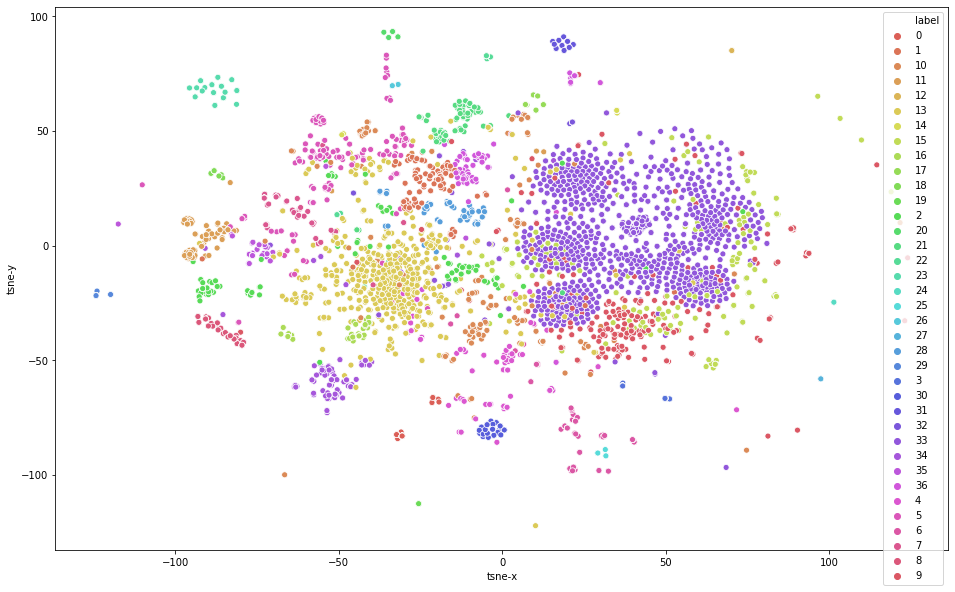

In [32]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-x", y="tsne-y",
    # size="tsne-z",
    hue="label",
    palette=sns.color_palette("hls", num_clusters),
    data=clustering_df,
    # legend="hue",
    alpha=1.0
)

In [33]:
for label, data_frame in clustering_df.groupby('label'):
    dataframe_utterances = list(data_frame['utterance'])
    num_dataframe_utterances = len(dataframe_utterances)
    print(f"{label}({num_dataframe_utterances}):")
    
    for utterance in dataframe_utterances[:30]:
        print(utterance)
        
    print()

0(61):
Thank you
Thanks
Thanks
Thank you
Thanks
Thanks
Thank you
Thank you
Thanks
Thank you
Thank you 🙏
Thanks
Thank you 🙏
Thank you
Thank you
Thank you
Thanks
thanks
Thank you so much
Thank you
Thanks
Thank
Thank you
Thanks
Thanks
Thank you
Thank you
Thanks
Thank you
Thank

1(111):
Tb
coronavirus
Infections
Coronavirus update today's announcement
Can it be cured?
How many people have survived Corona Virus in Free State
If you're HIV positive ..do you have more chances to get infected with Corona?
If you have the flu how do u treat ur flu
What are the sign of covid19 infections
What about those people have HIV
NUMBER OF PEOPLE INFECTED
Coronavirus
Does the virus kill
I'm infected
Coronavirus
How many people have corrona virus
1 symptoms nd chronic
Does this corrona affected people who have hiv positive
Angakanani amathuba wethu esine HIV wokuphila?ingabe sizofa yini?
Coronavirus symptoms
How people have corona virus
How to see symptoms ,
Cases, treatment, what other risks are there and